In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
from jupyterthemes import jtplot
import os

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
jtplot.style()
jtplot.style(figsize=(25, 8.5),spines=False, gridlines='--',ticks=True)

In [3]:
orders = pd.read_csv('Orders.csv', index_col=0)
returns = pd.read_csv('Returns.csv', index_col=0)

In [4]:
orders.describe()

,Postal.Code,Quantity,Discount,Shipping.Cost
count,9994.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,3.476545,0.142908,26.478567
std,32063.693350,2.278766,0.212280,57.251373
min,1040.000000,1.000000,0.000000,1.002000
25%,23223.000000,2.000000,0.000000,2.610000
50%,56430.500000,3.000000,0.000000,7.790000
75%,90008.000000,5.000000,0.200000,24.450000
max,99301.000000,14.000000,0.850000,933.570000


In [5]:
returns.describe()

,Order ID,Region
count,1079,1079
unique,1079,24
top,US-2013-PT1909018-41418,Western Europe
freq,1,121


In [6]:
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [7]:
returns.head()

,Order ID,Region
Returned,,
Yes,CA-2012-SA20830140-41210,Central US
Yes,IN-2012-PB19210127-41259,Eastern Asia
Yes,CA-2012-SC20095140-41174,Central US
Yes,IN-2015-JH158207-42140,Oceania
Yes,IN-2014-LC168857-41747,Oceania


In [8]:
orders = pd.merge(orders,returns,
                 left_on='Order.ID', 
                 right_on = 'Order ID',
                 how='left')

In [9]:
def tranformrow(r):
    if pd.isna(r["Order ID"]):
        r["Order ID"] = 0
        return r
    else:
        r["Order ID"] = 1
        return r
    
orders = orders.apply(tranformrow,axis=1)

In [11]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
#orders['year'] = orders['Order.Date'].dt.year
#orders['month'] = orders['Order.Date'].dt.month


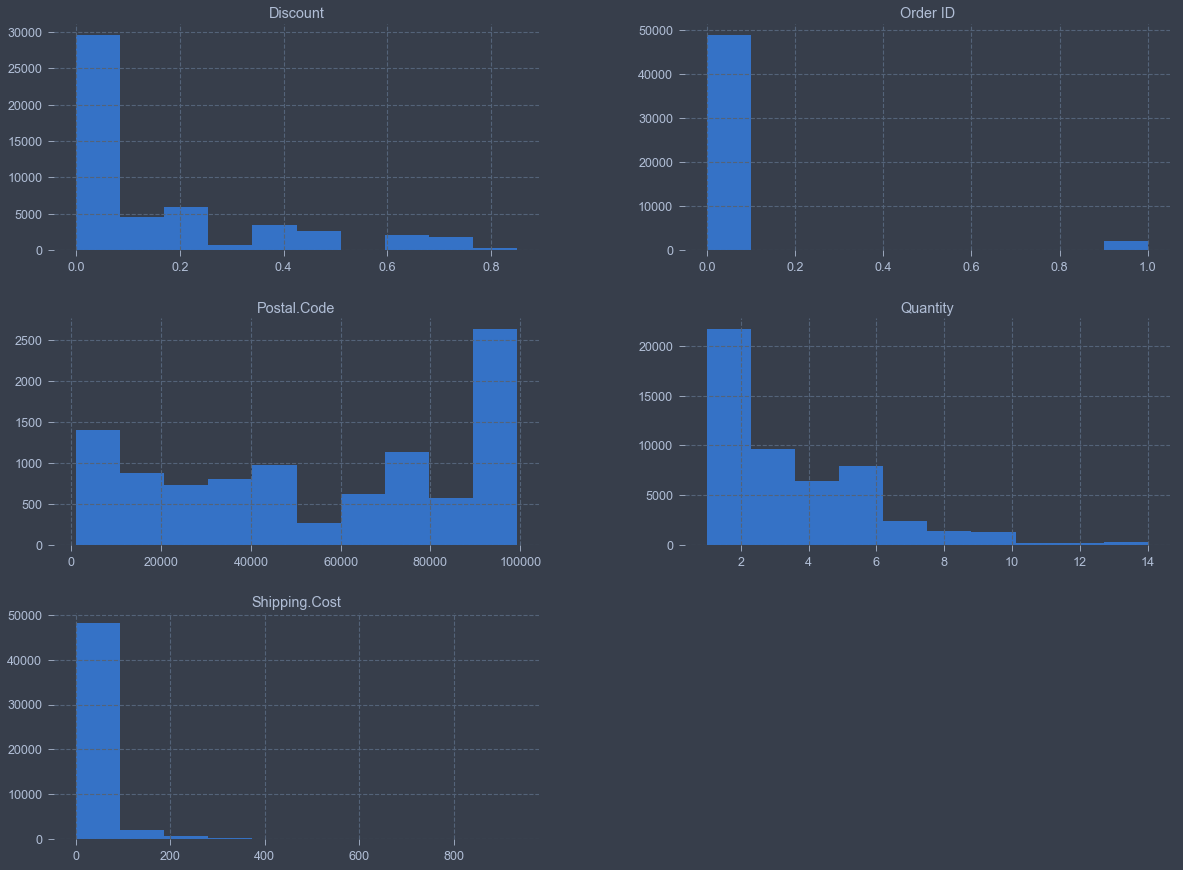

In [12]:
_ = orders.hist(figsize=(20,15))
orders['Sales'] = orders['Sales'].replace('[\$,]', '', regex=True).astype(float)
orders['Profit'] = orders['Profit'].replace('[\$,]', '', regex=True).astype(float)

Text(0.5, 0, 'Year')

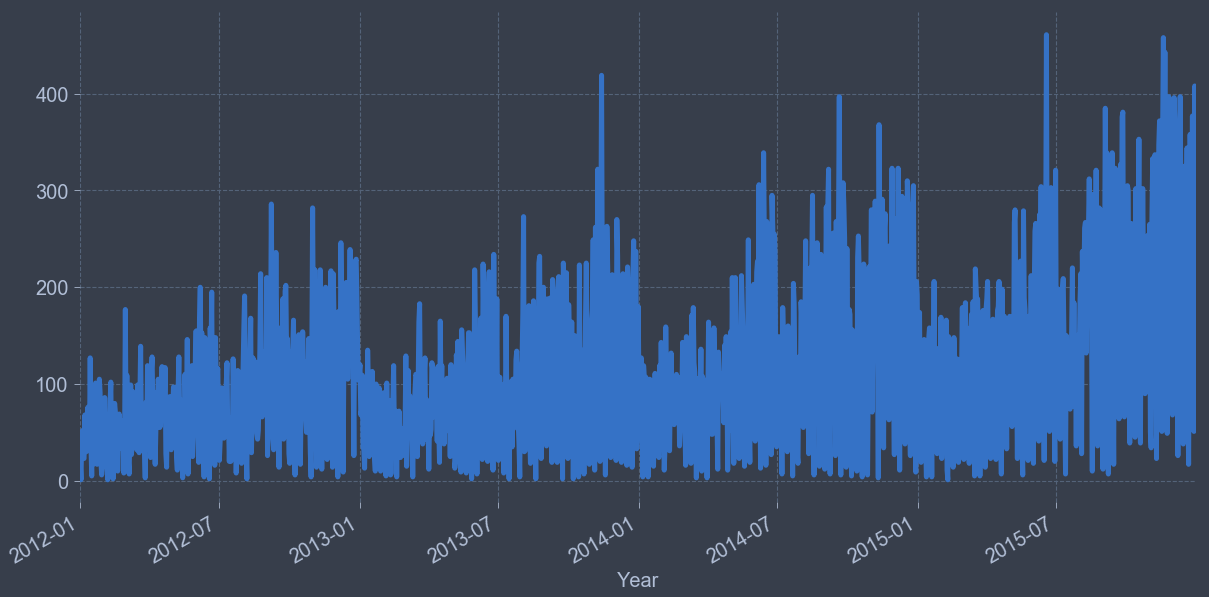

In [13]:
#1.Is there any seasonal trend of inventory in the company?
orderseason = orders.groupby(['Order.Date'])['Quantity'].sum()
orderseason.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20) #orderseason.index.year);

In [25]:
#2. Is the seasonal trend the same for different categories?
color = {'b', 'g', 'r'}
orderseason = orders.groupby(['Order.Date','Category'])['Quantity'].sum()
orderseason = pd.DataFrame(orderseason)
orderseason.reset_index(inplace=True)



In [37]:
#fig = px.line(orderseason, x='Order.Date', y='Quantity')
#fig.show()
fig = px.line(orderseason, x='Order.Date', y='Quantity', color="Category")
fig.update_traces(mode='lines', marker_line_width=.5, opacity=.5)
fig.show()


In [ ]:
#How much profit did we lose due to returns each year?
#2. How many customer returned more than once? more than 5 times?
#3. Which regions are more likely to return orders?
#4. Which categories (sub-categories) of products are more likely to be returned?

In [46]:
#How much profit did we lose due to returns each year?
orders['year'] = orders['Order.Date'].dt.year
return_yr = orders[orders['Order ID'] == 1]
return_yr.groupby(['year'])['Profit'].sum()


year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

In [58]:
#How many customer returned more than once? more than 5 times?
cust_ret = return_yr.groupby(['Customer.ID'])['Order ID'].sum()

cust_ret2 = cust_ret[cust_ret.values >=2]
cust_ret2
two = cust_ret2.count()

cust_ret5 = cust_ret[cust_ret.values >=5]
cust_ret5
five = cust_ret5.count()

print(two,five)

547 80


In [64]:
#3. Which regions are more likely to return orders?
regions = orders.groupby(['Order.Region']).agg({'Order ID' : ['sum'], 'Order.ID' : ['count']})
regions.reset_index(inplace=True)

In [70]:
regions['percent_returns'] = regions[('Order ID','sum')]/regions[('Order.ID','count')] 

,Order.Region,Order ID,Order.ID,percent_returns
,,sum,count,
0,Canada,15,384,0.039062
1,Caribbean,69,1690,0.040828
2,Central Africa,17,643,0.026439
3,Central America,248,5616,0.044160
4,Central Asia,9,217,0.041475
5,Central US,74,2323,0.031855
6,Eastern Africa,18,728,0.024725
7,Eastern Asia,131,2374,0.055181
8,Eastern Europe,42,1529,0.027469


In [76]:
fig = px.bar(regions,x='Order.Region', y='percent_returns', color = 'percent_returns')
fig.show()

In [77]:
#4. Which categories (sub-categories) of products are more likely to be returned?
subcats = orders.groupby(['Category','Sub.Category']).agg({'Order ID' : ['sum'], 'Order.ID' : ['count']})
subcats.reset_index(inplace=True)
subcats['percent_returns'] = subcats[('Order ID','sum')]/subcats[('Order.ID','count')] 

In [80]:
fig = px.bar(subcats,x='Sub.Category', y='percent_returns', color = 'percent_returns')
fig.show()

In [81]:
fig = px.bar(subcats,x='Category', y='percent_returns', color = 'percent_returns')
fig.show()